In [1]:
# Size of file cache: 
#    Note that the file cache size is determined by the OS and will be sensitive to other load 
#    on the machine; for an application accessing lots of file system data, an OS will use a 
#    notable fraction of main memory (GBs) for the file system cache. Report results as a graph 
#    whose x-axis is the size of the file being accessed and the y-axis is the average read I/O 
#    time. Do not use a system call or utility program to determine this metric except to 
#    sanity check.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read data
with open('data/file_cache_size_data.out') as f:
    raw = f.readlines()

In [4]:
# Process data
num_lines = len(raw)

x = [] #1024 * np.arange(num_lines) + 1
y = []
stds = []

for line in raw:
    bytes_read = line.split(',')[0].strip()
    bytes_read = bytes_read[bytes_read.index('(')+1: bytes_read.index(' MB')]
    bytes_read = int(bytes_read)
    x.append(bytes_read)
    blocks_read = bytes_read  # MB * 256 = Blocks
    
    mean = line.split(',')[1].strip()
    mean = mean[mean.index('(')+1: mean.index(' cycles')]
    
    std = line.split(',')[2].strip()
    std = std[std.index('(')+1: std.index(')')]    

    # convert cyles to milliseconds/block
    y.append(   float(mean)/(2.7 * blocks_read * 10**6))
    stds.append(float(std) /(2.7 * blocks_read * 10**6))

In [13]:
# from pprint import pprint
# pprint(x)
# pprint(y)


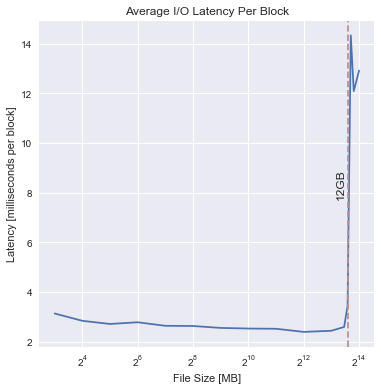

In [12]:
# Plot data
plt.figure(figsize=(6,6))
plt.plot(x, y)
plt.axvline(x=2**13+1024*4, color='rosybrown', linestyle='--', label='label')
plt.text(2**13+1000, 8.65, "12GB", rotation=90)
plt.xscale('log', basex=2)
# plt.yscale('log', basey=10)
plt.xlabel('File Size [MB]')
plt.ylabel('Latency [milliseconds per block]')
plt.title('Average I/O Latency Per Block')
# plt.savefig('data/fileCacheSizeResults.png')
plt.show()

/usr/local/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


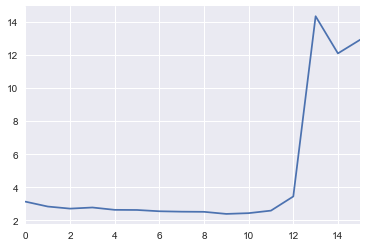

In [7]:
sns.set(color_codes=True)
ax = sns.tsplot(data=y, err_style='ci_band', ci=stds)